# Block 41: Workshop
## Wildlife Photo Augmentation with Multiple Images

### Problem Statement: 

You are tasked with building a Convolutional Neural Network (CNN) to classify images of animals into four categories: Squirrel, Elephant, Kangaroo, and Lion. You need to create a model that can accurately classify these animals based on the input images. 

### Overview: 

You have a set of images for each of the four animal categories. The images have varying dimensions, so you need to preprocess and standardize them. To improve the model's performance, you'll apply data augmentation techniques to increase the diversity of your training dataset. 

After building and training the CNN model, you'll visualize its training history to evaluate its performance. Finally, you'll demonstrate how to use the trained model to make predictions on new images. 

### Directions: 

1. __Load and Display Images:__ </br>
    - Load the provided animal images, including a Squirrel, Elephant, Kangaroo, and Lion. </br>
    - Display these images in a single plot. </br>

2. __Data Augmentation:__ </br>
    - Define a function <code>augment_data </code> that performs data augmentation on the input data (<code>X</code> and <code>y</code>). </br>
    - Apply the following augmentation techniques: </br>
        - Rotation by 20 degrees. </br>
        - Horizontal shift of 20% of the image width. </br>
        - Vertical shift of 20% of the image height. </br>
        - Horizontal flip. </br>
        - Use <code>ImageDataGenerator</code> from TensorFlow. </br>
3. __Label Assignment:__ </br>
    - Create a dictionary that maps animal names (Squirrel, Elephant, Kangaroo, Lion) to numerical labels (0, 1, 2, 3). </br>
4. __Data Preprocessing:__ </br>
    - Convert the loaded images to numpy arrays and normalize them by dividing by 255.0. </br>
    - Ensure that all images have the same dimensions by resizing them to the dimensions of the smallest image. </br>
5. __Model Architecture:__ </br>
    - Build a CNN model using the following layers: </br>
        - Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation. </br>
        - MaxPooling layer with a 2x2 pool size. </br>
        - Convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation. </br>
        - MaxPooling layer with a 2x2 pool size. </br>
        - Convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation. </br>
        - MaxPooling layer with a 2x2 pool size. </br>
        - Flatten layer. </br>
        - Dropout layer with a 50% dropout rate. </br>
        - Fully connected layer with 512 units and ReLU activation. </br>
        - Output layer with the number of units equal to the number of labels (4) and softmax activation. </br>
6. __Model Compilation:__ </br>
    - Compile the model using the Adam optimizer and categorical cross-entropy as the loss function. </br>
    - Monitor accuracy as a metric. </br>
7. __Model Training:__ </br>
    - Train the model using the data generated by the <code>augment_data</code> function. </br>
    - Train for 50 epochs and set <code>verbose</code> to 1 to display training progress. </br>
8. __Training Visualization:__ </br>
    - Plot two subplots: </br>
        - Subplot 1: Loss evolution (plot the training loss). </br>
        - Subplot 2: Accuracy evolution (plot the training accuracy). </br>
9. __Example Prediction:__ </br>
    - Select one of the preprocessed images. </br>
    - Use the trained model to make a prediction on this image. </br>
    - Print the predicted class (animal name) based on the model's output. </br> 

By following these directions, you'll create a CNN model for animal classification and verify its performance using data augmentation and visualization techniques.  

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2024-10-23 22:36:18.713605: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 22:36:18.753147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-10-23 22:36:28.027534: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
# Image file paths
image_files = {
    "Squirrel": "Squirrel-header.jpg",
    "Elephant": "elephant.jpg",
    "Kangaroo": "Kangaroo.jpg",
    "Lion": "Lion.jpg"
}

1. Load the images into a dictionary.

In [3]:
###
### YOUR CODE HERE
###
# Loop through the dictionary and display each image
Images = {}

for label, image_path in image_files.items():
    Images[label] = Image.open(image_path)
Images

{'Squirrel': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x450>,
 'Elephant': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=238x212>,
 'Kangaroo': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1500x1000>,
 'Lion': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x527>}

In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


2. Display the loaded images.

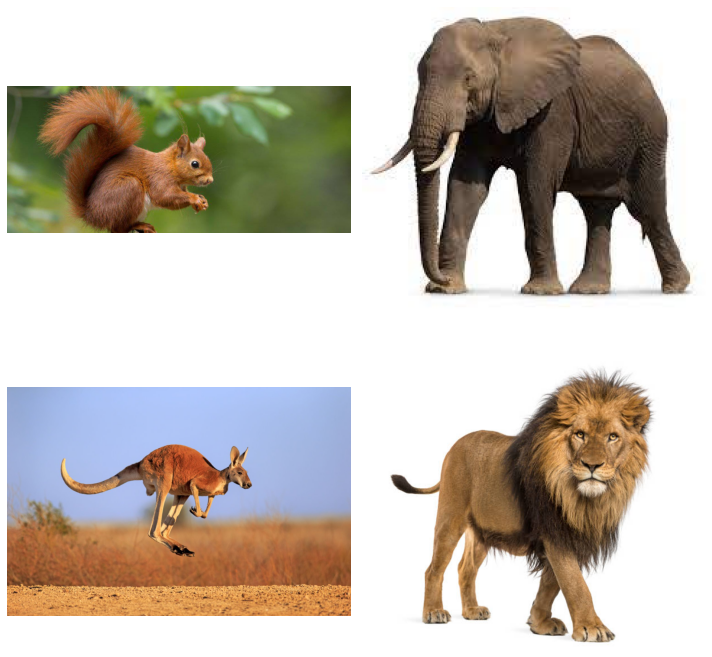

In [5]:
###
### YOUR CODE HERE
###

image1 = Images['Squirrel']
image2 = Images['Elephant']
image3 = Images['Kangaroo']
image4 = Images['Lion']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the images in each subplot
axes[0, 0].imshow(image1)
axes[0, 0].axis('off')  # Hide the axis

axes[0, 1].imshow(image2)
axes[0, 1].axis('off')

axes[1, 0].imshow(image3)
axes[1, 0].axis('off')

axes[1, 1].imshow(image4)
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with the images
plt.show()

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


3. Define a function <code>augment_data </code> that performs data augmentation on the input data (<code>X</code> and <code>y</code>). </br>
    - Apply the following augmentation techniques: </br>
        - Rotation by 20 degrees. </br>
        - Horizontal shift of 20% of the image width. </br>
        - Vertical shift of 20% of the image height. </br>
        - Horizontal flip. </br>
        - Use <code>ImageDataGenerator</code> from TensorFlow. </br>

In [7]:
###
### YOUR CODE HERE
###
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data(X, y, batch_size=4):
    # Suppose X is image data and y is the corresponding labels
    # Create an ImageDataGenerator object with the desired augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,  # Rotate images by 20 degrees
        width_shift_range=0.2,  # Horizontal shift by 20% of the image width
        height_shift_range=0.2,  # Vertical shift by 20% of the image height
        horizontal_flip=True  # Perform horizontal flip
    )
    
    # Apply the augmentations to the input data (X and y)
    augmented_data = datagen.flow(X, y, batch_size=batch_size)

    return augmented_data   


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


4. Assign labels to the images.

In [9]:
###
### YOUR CODE HERE
###
animal_to_label = {
    'Squirrel': 0,
    'Elephant': 1,
    'Kangaroo': 2,
    'Lion': 3
}

In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


5. Create a function for data augmentation.

In [11]:
###
### YOUR CODE HERE
###


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


6. Assign labels to the images.

In [13]:
###
### YOUR CODE HERE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


7. Convert the images and labels into lists for easier processing.

In [15]:
###
### YOUR CODE HERE
###


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


8. Convert the images into NumPy arrays and normalize them.

In [17]:
###
### YOUR CODE HERE
###


In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


9. Convert the data into NumPy arrays.

In [19]:
###
### YOUR CODE HERE
###


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


10. Ensure all images have the same dimensions (resizing to the smallest image dimensions).

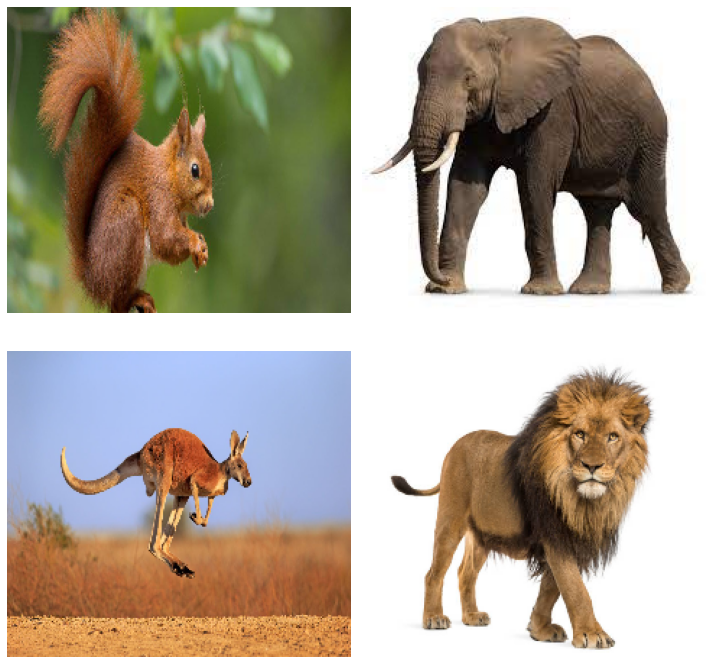

In [21]:
def preprocess_images_from_dict(image_dict):
    # Step 1: Convert images to numpy arrays
    image_arrays = {key: tf.keras.preprocessing.image.img_to_array(img) for key, img in image_dict.items()}
    
    # Step 2: Find the dimensions of the smallest image
    min_height = min(img.shape[0] for img in image_arrays.values())
    min_width = min(img.shape[1] for img in image_arrays.values())
    
    # Step 3: Resize all images to the smallest dimensions
    resized_images = {key: tf.image.resize(img, (min_height, min_width)).numpy() for key, img in image_arrays.items()}
    
    #Step 4: Normalize the image data (divide by 255.0)
    normalized_images = {key: img / 255.0 for key, img in resized_images.items()}
    
    return normalized_images

Images = preprocess_images_from_dict(Images)

image1 = Images['Squirrel']
image2 = Images['Elephant']
image3 = Images['Kangaroo']
image4 = Images['Lion']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the images in each subplot
axes[0, 0].imshow(image1)
axes[0, 0].axis('off')  # Hide the axis

axes[0, 1].imshow(image2)
axes[0, 1].axis('off')

axes[1, 0].imshow(image3)
axes[1, 0].axis('off')

axes[1, 1].imshow(image4)
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with the images
plt.show()

In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


11. Augment the data.

In [23]:
###
### YOUR CODE HERE
###

# Convert dict values and keys to lists
image_list = list(Images.values())
label_list = list(Images.keys())
# Convert image_list (list of images) to a NumPy array
image_array = np.array(image_list)
# Convert label_list (list of labels) to a NumPy array
label_array = np.array(label_list)


In [24]:
image_array

array([[[[0.29355073, 0.331613  , 0.24095559],
         [0.26820418, 0.30741987, 0.20938066],
         [0.24283259, 0.28204829, 0.17616592],
         ...,
         [0.25351024, 0.2966475 , 0.12802006],
         [0.24141695, 0.28455418, 0.11592675],
         [0.24026375, 0.28340098, 0.11477354]],

        [[0.30464298, 0.34270525, 0.2520478 ],
         [0.28333443, 0.32255012, 0.2245109 ],
         [0.26995498, 0.30917066, 0.20328829],
         ...,
         [0.24111119, 0.28424844, 0.115621  ],
         [0.24581946, 0.2889567 , 0.12032926],
         [0.24581946, 0.2889567 , 0.12032926]],

        [[0.31033927, 0.34171182, 0.25382254],
         [0.30074102, 0.33211356, 0.23799591],
         [0.28551608, 0.3208102 , 0.21492785],
         ...,
         [0.23885879, 0.28199604, 0.11336859],
         [0.23997411, 0.28311136, 0.11448391],
         [0.24112731, 0.28426456, 0.11563711]],

        ...,

        [[0.42184058, 0.52772295, 0.39600438],
         [0.42669246, 0.52865326, 0.41492775]

In [25]:
# Apply data augmentation
#Images = augment_data(X=image_array, y=label_array)

#Images

In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


12. Build the CNN model, compile it, and create a summary.

In [28]:
###
### YOUR CODE HERE
###

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(212, 238, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(rate=0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


13. Train the model and plot two subplots.

In [29]:
###
### YOUR CODE HERE
###
from tensorflow.keras.utils import to_categorical

label_list = [0, 1, 2, 3]
# Assuming label_list contains integer labels (0, 1, 2, 3)
one_hot_labels = to_categorical(label_list, num_classes=4)


datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Horizontal shift by 20% of the image width
    height_shift_range=0.2,  # Vertical shift by 20% of the image height
    horizontal_flip=True  # Perform horizontal flip
)

# Apply the augmentations to the input data (X and y)
augmented_data = datagen.flow(x=image_array, y=one_hot_labels, batch_size=32)


history = model.fit(
    augmented_data,
    batch_size=32,
    epochs=50,
    verbose=1
)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.3696 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 481ms/step - loss: 1.3474 - accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 405ms/step - loss: 2.1605 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 479ms/step - loss: 2.1065 - accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 486ms/step - loss: 2.7800 - accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 408ms/step - loss: 1.2467 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 476ms/step - loss: 1.1393 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 394ms/step - loss: 1.1705 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 415ms/step - loss: 0.9623 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 473ms/step - loss: 0.6594 - accuracy: 0.7500
Epoch 11/50
1/1 [=====

In [ ]:
one_hot_labels

In [ ]:
history.history.keys()

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


14. Make a prediction using an image of your choice.

1/1 [==============================] - 0s 226ms/step


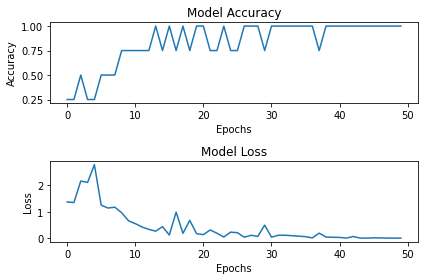

(array([[6.9306187e-02, 1.2485619e-04, 1.0000000e+00, 1.5327832e-01],
        [1.5572002e-03, 9.9999964e-01, 2.3534657e-01, 9.8370779e-01],
        [9.9999487e-01, 3.2351024e-03, 2.5087613e-01, 7.2532094e-01],
        [7.4163473e-01, 4.5081574e-01, 2.3592543e-02, 9.9998814e-01]],
       dtype=float32),
 array(['Kangaroo', 'Elephant', 'Squirrel', 'Lion'], dtype='<U8'))

In [30]:
###
### YOUR CODE HERE
###

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

#print('Original Images: ', list(zip(image_array, label_array)))
image_array, label_array =  unison_shuffled_copies(image_array, label_array)

#print('Shuffeled Images: ', list(zip(image_array, label_array)))
pred_labels = model.predict(image_array)


# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1) 

# Plot on the first subplot
ax1.plot(list(range(0, 50)), history.history['accuracy'])
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_title('Model Accuracy')

# Plot on the second subplot
ax2.plot(list(range(0, 50)), history.history['loss'])
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_title('Model Loss')

# Adjust spacing between subplots
plt.tight_layout() 
plt.show()



pred_labels, label_array

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [31]:
def find_key_by_value(d, target_value):
    return next((key for key, value in d.items() if value == target_value), None)

 
for labels, actual_label in zip(pred_labels, label_array):
    highest_score = np.max(labels)  # Find the maximum value
    score = np.argmax(labels)       # Get the index of the maximum value
    predicted_label = find_key_by_value(animal_to_label, score)
    
    print(f'Predicted Label: \t {predicted_label} \nActual Label: \t\t {actual_label} \n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
         

Predicted Label: 	 Kangaroo 
Actual Label: 		 Kangaroo 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Elephant 
Actual Label: 		 Elephant 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Squirrel 
Actual Label: 		 Squirrel 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Label: 	 Lion 
Actual Label: 		 Lion 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
